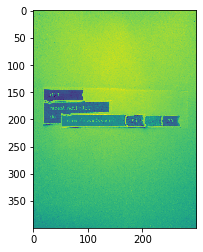

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 as cv
import pytesseract
import os
from PIL import Image
from scipy.ndimage import label
from scipy.ndimage import binary_opening, binary_closing

A = np.array(Image.open('test_images/no_crop.jpg'))
A = np.rot90(A, -1)
A = cv.resize(A, dsize=(300, 400), interpolation=cv.INTER_CUBIC)
A_gray = cv.cvtColor(A, cv.COLOR_BGR2GRAY)
plt.imshow(A_gray)
plt.show()

137.0


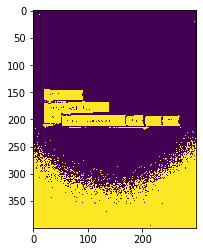

In [3]:
threshold, A_bin = cv.threshold(A_gray, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
print(threshold)
A_bin = np.invert(A_bin)
plt.imshow(A_bin)
plt.show()

Low pixel filter 360.0 High pixel filter 36000.0
Initial components: 888
Number of selected components: 8


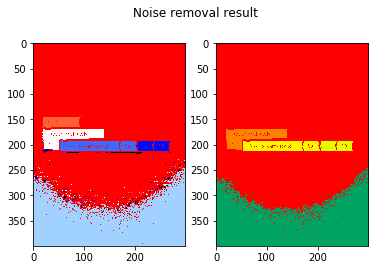

In [8]:
def filter_features(binary):
    features_list = label(binary)
    connected_components = features_list[0]
    processed_result = np.copy(connected_components)
    # remove a feature if it covers over 30% of the image or les than 0.03%
    low_filter = .003*np.prod(connected_components.shape)
    high_filter = .3*np.prod(connected_components.shape)
    print('Low pixel filter {} High pixel filter {}'.format(low_filter, high_filter))
    print('Initial components: {}'.format(features_list[1]))
    components = 0
    for feature in range(features_list[1]):
        if(np.count_nonzero(connected_components == feature) < low_filter):
            processed_result[connected_components == feature] = 0
            continue
        components += 1
        #print(np.count_nonzero(css == i))
    print('Number of selected components: {}'.format(components))
    return processed_result, connected_components

processed_result, connected_components = filter_features(A_bin)
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Noise removal result')
ax1.imshow(connected_components, cmap='flag')
ax2.imshow(processed_result, cmap='prism')
fig.show()

In [14]:
 features_list = label(processed_result)
 connected_components = features_list[0]
processed_result = np.copy(connected_components)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [7 7 7 ... 7 7 7]
 [7 7 7 ... 7 7 7]
 [7 7 7 ... 7 7 7]]
